In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [21]:
x = np.random.normal(loc=3.0, scale=0.5, size=100)
y = 1 + 1.5*x + np.random.normal(scale=1, size=100)

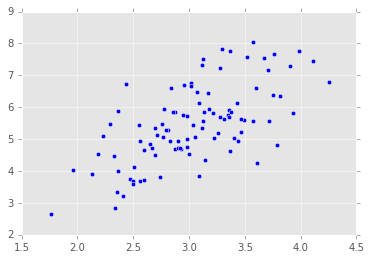

In [22]:
fig, ax = plt.subplots()
ax.scatter(x, y)

In [23]:
ye = np.exp(1 + 1.5*x + np.random.normal(scale=1, size=100))

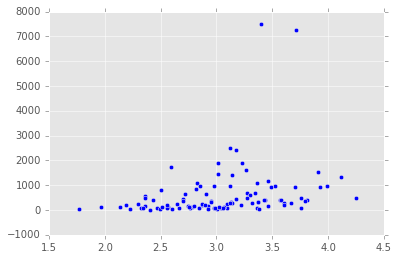

In [24]:
fig, ax = plt.subplots()
ax.scatter(x, ye)

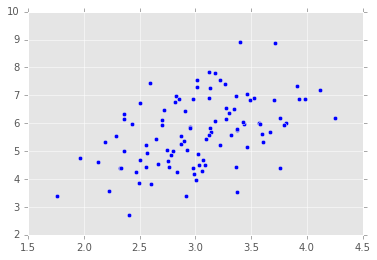

In [25]:
fig, ax = plt.subplots()
ax.scatter(x, np.log(ye))

## Fitting Models

In [39]:
df = pd.DataFrame({
        "x": x,
        "y": y,
        "ye": ye,
        "ylog": np.log(ye)
    })

M = smf.ols("y ~ x", data=df)
res = M.fit()

### Linear Model is Correct

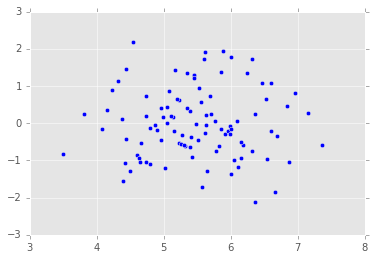

In [29]:
fig, ax = plt.subplots()
ax.scatter(res.fittedvalues, res.resid)

(1, 5)

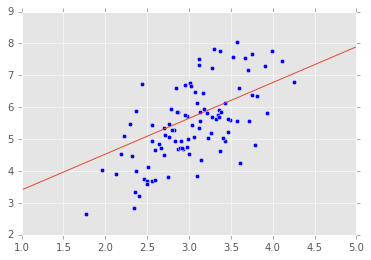

In [43]:
fig, ax = plt.subplots()

t = np.linspace(1, 5, num=250)
line = res.params[0] + res.params[1]*t

ax.plot(t, line)
ax.scatter(x, y)
ax.set_xlim(1, 5)

### Linear Model is Incorrect

In [32]:
M = smf.ols("ye ~ x", data=df)
res = M.fit()

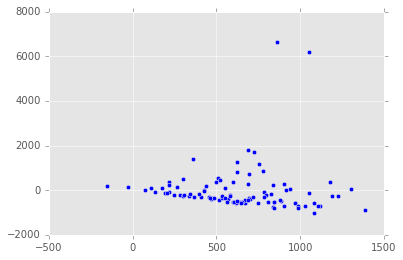

In [33]:
fig, ax = plt.subplots()
ax.scatter(res.fittedvalues, res.resid)

(1, 5)

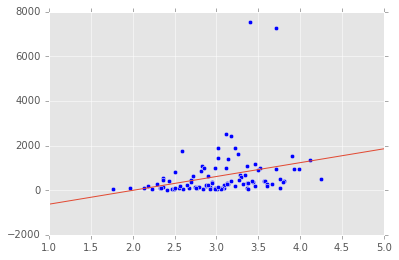

In [36]:
fig, ax = plt.subplots()

t = np.linspace(1, 5, num=250)
line = res.params[0] + res.params[1]*t

ax.plot(t, line)
ax.scatter(x, ye)
ax.set_xlim(1, 5)

### Log Transforming y

In [40]:
M = smf.ols("ylog ~ x", data=df)
res = M.fit()

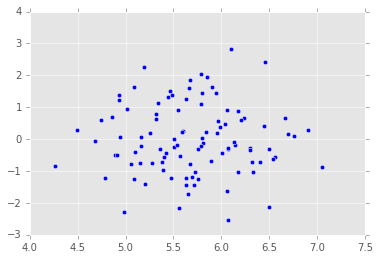

In [41]:
fig, ax = plt.subplots()
ax.scatter(res.fittedvalues, res.resid)

(1, 5)

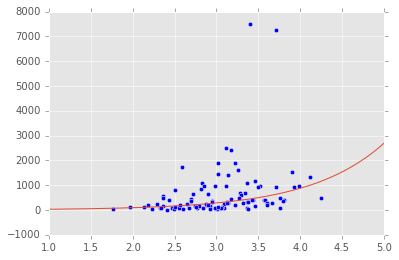

In [42]:
fig, ax = plt.subplots()

t = np.linspace(1, 5, num=250)
line = np.exp(res.params[0] + res.params[1]*t)

ax.plot(t, line)
ax.scatter(x, ye)
ax.set_xlim(1, 5)